# Data Cleaning 
Data cleaning, also known as data cleansing or scrubbing, identifies and fixes errors, duplicates, and irrelevant data from a raw dataset. Its a part of data preperation process. Cleaning allows accurate, defensible data that generates reliable visualizations, models, and business decisions. 

In [1]:
# Importing the dependencies
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_csv("data (1).csv")     # Read the data

In [3]:
# Checking the first 5 rows
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
data.dtypes    # Checking the data types

date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
street            object
city              object
statezip          object
country           object
dtype: object

In [5]:
data.shape    # Checking dimensions 

(4600, 18)

In [6]:
data.isnull().sum()      # Checking for null or empty values in dataset

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

As we can see there are no null values in the dataset. So, we can proceed further.
Checking value counts for differnt columns.

In [7]:
data['country'].value_counts()

country
USA    4600
Name: count, dtype: int64

In [8]:
data['city'].value_counts()

city
Seattle                1573
Renton                  293
Bellevue                286
Redmond                 235
Issaquah                187
Kirkland                187
Kent                    185
Auburn                  176
Sammamish               175
Federal Way             148
Shoreline               123
Woodinville             115
Maple Valley             96
Mercer Island            86
Burien                   74
Snoqualmie               71
Kenmore                  66
Des Moines               58
North Bend               50
Covington                43
Duvall                   42
Lake Forest Park         36
Bothell                  33
Newcastle                33
SeaTac                   29
Tukwila                  29
Vashon                   29
Enumclaw                 28
Carnation                22
Normandy Park            18
Clyde Hill               11
Medina                   11
Fall City                11
Black Diamond             9
Ravensdale                7
Pacific        

In [9]:
data['statezip'].value_counts()

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
           ... 
WA 98047      6
WA 98288      3
WA 98050      2
WA 98354      2
WA 98068      1
Name: count, Length: 77, dtype: int64

In [10]:
data.describe

<bound method NDFrame.describe of                      date         price  bedrooms  bathrooms  sqft_living   
0     2014-05-02 00:00:00  3.130000e+05       3.0       1.50         1340  \
1     2014-05-02 00:00:00  2.384000e+06       5.0       2.50         3650   
2     2014-05-02 00:00:00  3.420000e+05       3.0       2.00         1930   
3     2014-05-02 00:00:00  4.200000e+05       3.0       2.25         2000   
4     2014-05-02 00:00:00  5.500000e+05       4.0       2.50         1940   
...                   ...           ...       ...        ...          ...   
4595  2014-07-09 00:00:00  3.081667e+05       3.0       1.75         1510   
4596  2014-07-09 00:00:00  5.343333e+05       3.0       2.50         1460   
4597  2014-07-09 00:00:00  4.169042e+05       3.0       2.50         3010   
4598  2014-07-10 00:00:00  2.034000e+05       4.0       2.00         2090   
4599  2014-07-10 00:00:00  2.206000e+05       3.0       2.50         1490   

      sqft_lot  floors  waterfront  view 

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

In [12]:
data.drop('country', axis=1, inplace = True)          # Dropping country from dataset

In [13]:
data.shape

(4600, 17)

In [14]:
# Converting float values to integer
data['price'] = data['price'].astype(int)
data['bedrooms'] = data['bedrooms'].astype(int)
data['bathrooms'] = data['bathrooms'].astype(int)
data['floors'] = data['floors'].astype(int)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   date           4600 non-null   object
 1   price          4600 non-null   int32 
 2   bedrooms       4600 non-null   int32 
 3   bathrooms      4600 non-null   int32 
 4   sqft_living    4600 non-null   int64 
 5   sqft_lot       4600 non-null   int64 
 6   floors         4600 non-null   int32 
 7   waterfront     4600 non-null   int64 
 8   view           4600 non-null   int64 
 9   condition      4600 non-null   int64 
 10  sqft_above     4600 non-null   int64 
 11  sqft_basement  4600 non-null   int64 
 12  yr_built       4600 non-null   int64 
 13  yr_renovated   4600 non-null   int64 
 14  street         4600 non-null   object
 15  city           4600 non-null   object
 16  statezip       4600 non-null   object
dtypes: int32(4), int64(9), object(4)
memory usage: 539.2+ KB


# Handling Categorical Columns

In [16]:
def ApplyLabelEncoder(data, col_name):
    Le = LabelEncoder()
    data[col_name] = Le.fit_transform(data[col_name])
    return data
def HandleCategoricalData(data, le_cols):
    for col in le_cols: 
        data = ApplyLabelEncoder(data, col)
    return data

In [17]:
le_cols = ['city']

data = HandleCategoricalData(data, le_cols)

In [18]:
data['city'].head()

0    36
1    35
2    18
3     3
4    31
Name: city, dtype: int32

In [19]:
data_types = dict(data.dtypes)
print(data_types)

{'date': dtype('O'), 'price': dtype('int32'), 'bedrooms': dtype('int32'), 'bathrooms': dtype('int32'), 'sqft_living': dtype('int64'), 'sqft_lot': dtype('int64'), 'floors': dtype('int32'), 'waterfront': dtype('int64'), 'view': dtype('int64'), 'condition': dtype('int64'), 'sqft_above': dtype('int64'), 'sqft_basement': dtype('int64'), 'yr_built': dtype('int64'), 'yr_renovated': dtype('int64'), 'street': dtype('O'), 'city': dtype('int32'), 'statezip': dtype('O')}


In [20]:
NUMERICAL_COLS = []

for col, dtype in data_types.items():
    if dtype in [int, float] and len(data[col].unique()) > 5:
        NUMERICAL_COLS.append(col)

In [21]:
NUMERICAL_COLS

['price', 'bedrooms', 'bathrooms', 'city']

# Fixing Outliers

In [22]:
def FixOutliers(data , col, threshold = {}, method = 'imputer', NUMERICAL_COLS = []):
    if NUMERICAL_COLS == []:
        NUMERICAL_COLS = data.columns
    if method == 'imputer': # you have converted outliers to nulls
        imputer = KNNImputer()
        data.loc[:, NUMERICAL_COLS] = imputer.fit_transform(data.loc[:, NUMERICAL_COLS])
    else:
        data.loc[:, col] = np.clip(data[col].values, threshold['low'], threshold['high'])
    return data.loc[:, col]

In [23]:
def DetectOutlier_ZScore(data, col_name, method = 'imputer'):
    col_values = data.loc[:, col_name] # series object
    upper_limit = col_values.mean() + 3*col_values.std()
    lower_limit = col_values.mean() - 3*col_values.std()

    outliers = np.logical_or(col_values.values > upper_limit, col_values.values < lower_limit) # vector of booleans 
    idxs = np.where(outliers)[0]

    print(" Outliers Detected : ", len(idxs))

    plt.plot([upper_limit]*data.shape[0])
    plt.plot([lower_limit]*data.shape[0])
    plt.scatter(x = [i for i in range(data.shape[0])] , y = col_values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

    print(" Fixing Outliers ")
    if method == 'imputer':
        data.loc[idxs, col_name] = np.nan # converting outliers to nulls 
        data.loc[:, col_name] = FixOutliers(data, col_name, NUMERICAL_COLS = NUMERICAL_COLS)
    else:
        data.loc[:, col_name] = FixOutliers(data, col_name, threshold = {'high' : upper_limit, 'low' : lower_limit}, method = 'clipping')

    plt.plot([upper_limit]*data.shape[0])
    plt.plot([lower_limit]*data.shape[0])
    plt.scatter(x = [i for i in range(data.shape[0])] , y = data.loc[:, col_name].values)
    plt.xlabel("Data Points ")
    plt.ylabel(col_name)
    plt.title(f" Outliers in {col_name} ")
    plt.show()

 Outliers Detected :  34


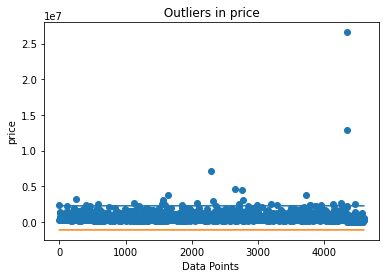

 Fixing Outliers 


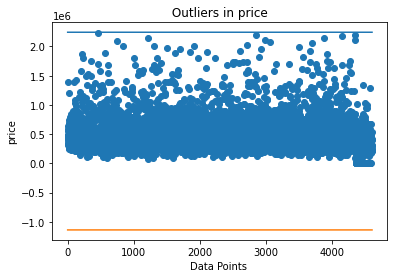

In [24]:
DetectOutlier_ZScore(data, 'price')

 Outliers Detected :  19


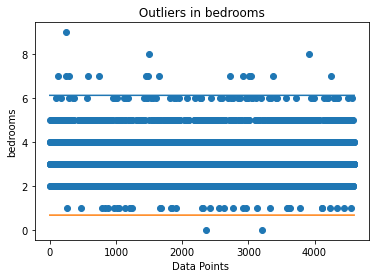

 Fixing Outliers 


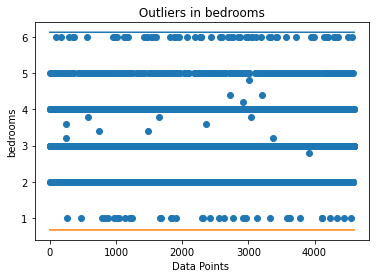

In [25]:
DetectOutlier_ZScore(data, 'bedrooms')

 Outliers Detected :  20


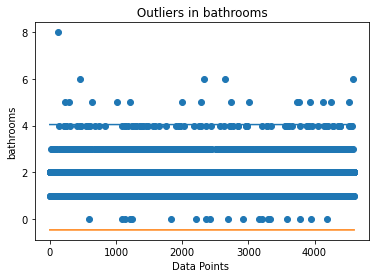

 Fixing Outliers 


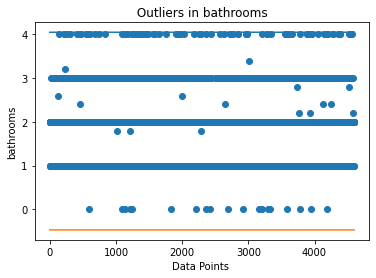

In [26]:
DetectOutlier_ZScore(data, 'bathrooms')

 Outliers Detected :  0


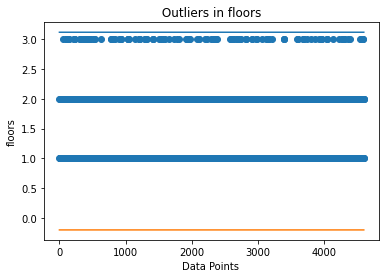

 Fixing Outliers 


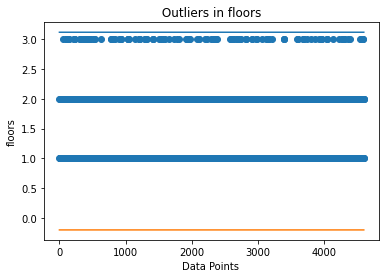

In [27]:
DetectOutlier_ZScore(data, 'floors')

In [28]:
# Converting date to datetime 
data['date']= pd.to_datetime(data['date'])

In [29]:
# Convertig date to integer type
data['Day'] = data['date'].dt.day
data['Month'] = data['date'].dt.month
data['Year'] = data['date'].dt.year

In [30]:
data.head()    # Checking the changes 

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,Day,Month,Year
0,2014-05-02,313000.0,3.0,1.0,1340,7912,1,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,36,WA 98133,2,5,2014
1,2014-05-02,393400.0,5.0,2.0,3650,9050,2,0,4,5,3370,280,1921,0,709 W Blaine St,35,WA 98119,2,5,2014
2,2014-05-02,342000.0,3.0,2.0,1930,11947,1,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,18,WA 98042,2,5,2014
3,2014-05-02,420000.0,3.0,2.0,2000,8030,1,0,0,4,1000,1000,1963,0,857 170th Pl NE,3,WA 98008,2,5,2014
4,2014-05-02,550000.0,4.0,2.0,1940,10500,1,0,0,4,1140,800,1976,1992,9105 170th Ave NE,31,WA 98052,2,5,2014


In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   int32         
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

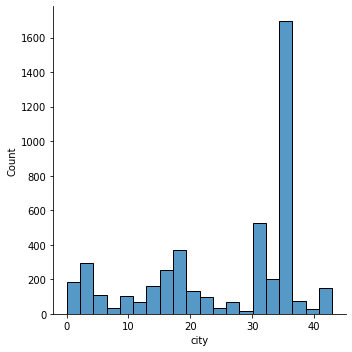

In [32]:
sns.displot(data['city'])
plt.show()

<Axes: xlabel='bedrooms', ylabel='price'>

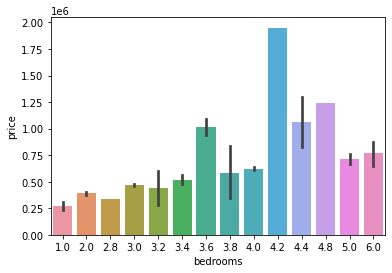

In [33]:
sns.barplot(data= data, x = data['bedrooms'], y = data['price'])

<Axes: xlabel='city', ylabel='price'>

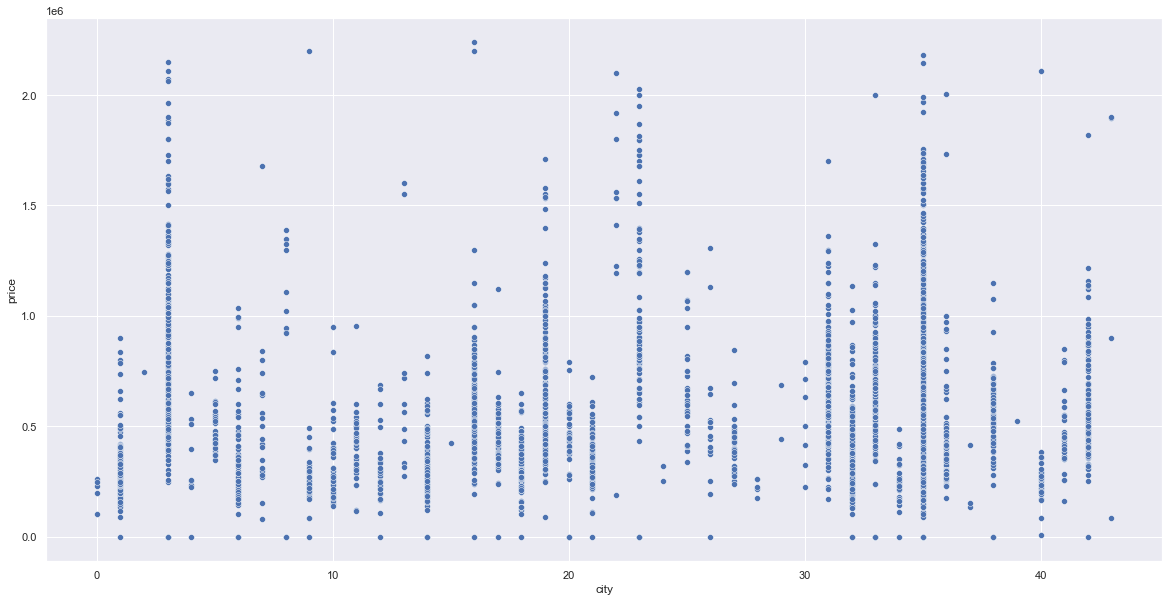

In [34]:
sns.set(rc= {'figure.figsize':(20,10)})
sns.scatterplot(data= data, x= data['city'], y = data['price'])

In [35]:
# Removing WA from statezip to convert it into integer type
data['statezip'] = data['statezip'].str.strip("WA")

In [36]:
data['statezip'].head()

0     98133
1     98119
2     98042
3     98008
4     98052
Name: statezip, dtype: object

In [37]:
data['statezip'] = data['statezip'].astype('int')

In [38]:
data['statezip'].dtypes

dtype('int32')

In [39]:
# Dropping date and street from dataset
data.drop('date', axis = 1, inplace = True)          
data.drop('street', axis = 1, inplace = True)

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          4600 non-null   float64
 1   bedrooms       4600 non-null   float64
 2   bathrooms      4600 non-null   float64
 3   sqft_living    4600 non-null   int64  
 4   sqft_lot       4600 non-null   int64  
 5   floors         4600 non-null   int32  
 6   waterfront     4600 non-null   int64  
 7   view           4600 non-null   int64  
 8   condition      4600 non-null   int64  
 9   sqft_above     4600 non-null   int64  
 10  sqft_basement  4600 non-null   int64  
 11  yr_built       4600 non-null   int64  
 12  yr_renovated   4600 non-null   int64  
 13  city           4600 non-null   int32  
 14  statezip       4600 non-null   int32  
 15  Day            4600 non-null   int32  
 16  Month          4600 non-null   int32  
 17  Year           4600 non-null   int32  
dtypes: float

Now we can see that all the categorical data is converted to numeric columns.

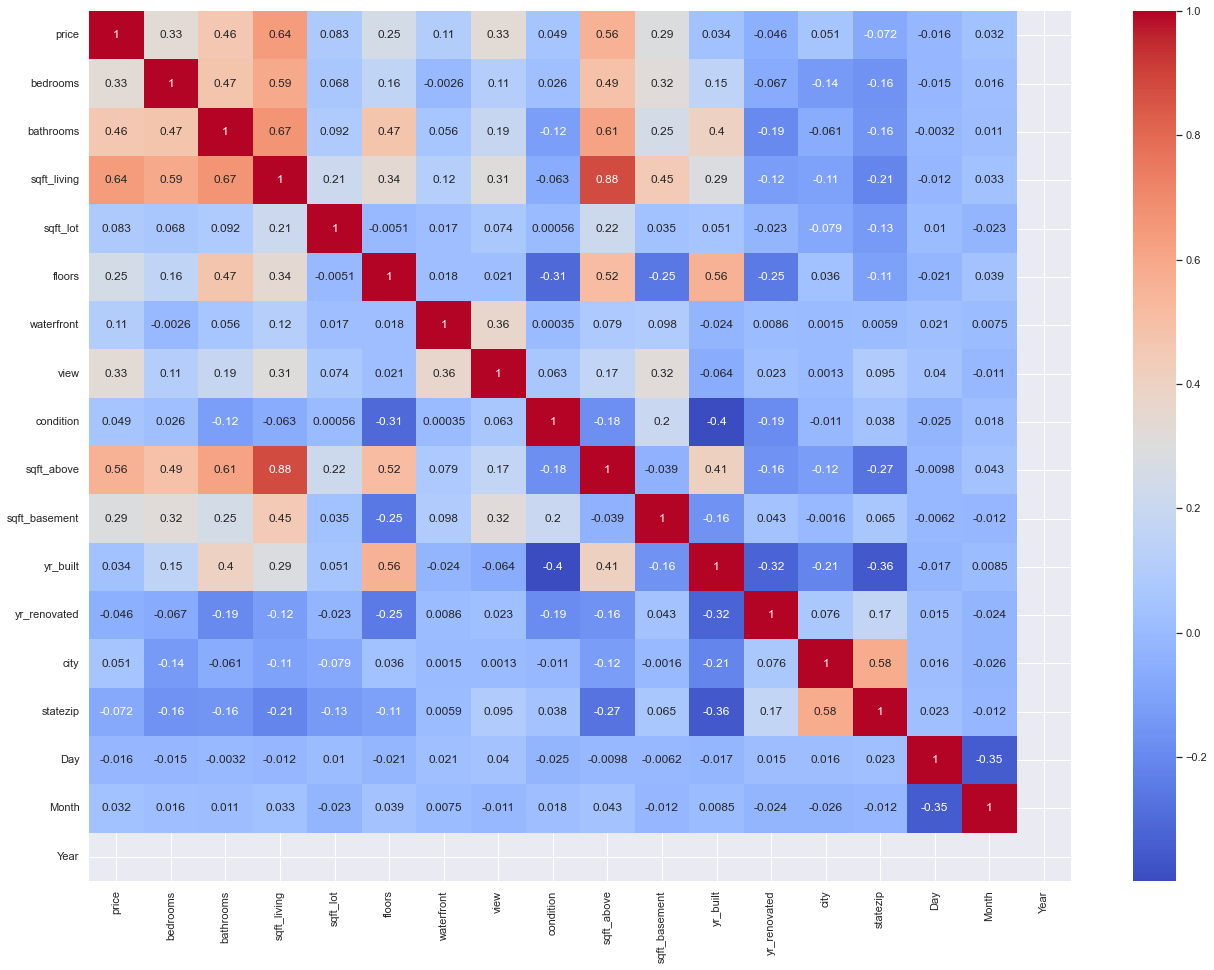

In [41]:
# Designing a heatmap to find correlation between columns
cor = data.corr()

plt.figure(figsize=(22,16))
sns.heatmap(cor,annot=True,cmap="coolwarm")
plt.show()

# Scaling the data

In [42]:
Scaler = StandardScaler()
data.iloc[:, :] = Scaler.fit_transform(data)
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,Day,Month,Year
0,-0.705649,-0.445427,-1.086096,-0.829971,-0.193434,-0.831557,-0.085004,-0.309194,-0.667112,-0.565224,-0.672464,-0.531014,1.221670,0.861805,1.009107,-1.474226,-1.107976,0
1,-0.445763,1.837032,0.312963,1.568528,-0.161718,0.979599,-0.085004,4.830079,2.286416,1.789559,-0.069128,-1.674693,-0.825693,0.778343,0.745633,-1.474226,-1.107976,0
2,-0.611909,-0.445427,0.312963,-0.217367,-0.080978,-0.831557,-0.085004,-0.309194,0.809652,0.119171,-0.672464,-0.161000,-0.825693,-0.640521,-0.703469,-1.474226,-1.107976,0
3,-0.359781,-0.445427,0.312963,-0.144686,-0.190145,-0.831557,-0.085004,-0.309194,0.809652,-0.959621,1.482306,-0.261913,-0.825693,-1.892459,-1.343333,-1.474226,-1.107976,0
4,0.060432,0.695803,0.312963,-0.206984,-0.121306,-0.831557,-0.085004,-0.309194,0.809652,-0.797222,1.051352,0.175376,1.208396,0.444493,-0.515274,-1.474226,-1.107976,0


In [43]:
X = data.iloc[:, :-1].values
Y = data.iloc[:, -1].values

In [44]:
X.shape, Y.shape

((4600, 17), (4600,))

In [45]:
#Train and Split the data

In [46]:
X = data.drop(['price'],axis=1)
Y = data['price']

In [47]:
print(X)

      bedrooms  bathrooms  sqft_living  sqft_lot    floors  waterfront   
0    -0.445427  -1.086096    -0.829971 -0.193434 -0.831557   -0.085004  \
1     1.837032   0.312963     1.568528 -0.161718  0.979599   -0.085004   
2    -0.445427   0.312963    -0.217367 -0.080978 -0.831557   -0.085004   
3    -0.445427   0.312963    -0.144686 -0.190145 -0.831557   -0.085004   
4     0.695803   0.312963    -0.206984 -0.121306 -0.831557   -0.085004   
...        ...        ...          ...       ...       ...         ...   
4595 -0.445427  -1.086096    -0.653458 -0.236689 -0.831557   -0.085004   
4596 -0.445427   0.312963    -0.705374 -0.202882  0.979599   -0.085004   
4597 -0.445427   0.312963     0.904009 -0.218462  0.979599   -0.085004   
4598  0.695803   0.312963    -0.051238 -0.229164 -0.831557   -0.085004   
4599 -0.445427   0.312963    -0.674224 -0.188139  0.979599   -0.085004   

          view  condition  sqft_above  sqft_basement  yr_built  yr_renovated   
0    -0.309194  -0.667112   -0.

In [48]:
print(Y)

0      -0.705649
1      -0.445763
2      -0.611909
3      -0.359781
4       0.060432
          ...   
4595   -0.721275
4596    0.009790
4597   -0.369789
4598   -1.059922
4599   -1.004324
Name: price, Length: 4600, dtype: float64


In [49]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.1, random_state=42)

In [50]:
X_train.shape, Y_train.shape

((4140, 17), (4140,))

In [51]:
X_test.shape, Y_test.shape

((460, 17), (460,))

In [52]:
def MeanSquaredError(Actual, Prediction):
    return np.mean(np.square(Actual - Prediction))

In [53]:
def RootMeanSquaredError(Actual, Prediction):
    return np.sqrt(MeanSquaredError(Actual, Prediction))

In [54]:
def PrintMetrics(Actual, Prediction):
    print(" MeanSquaredError : ", MeanSquaredError(Actual, Prediction))
    print(" RootMeanSquaredError : ", RootMeanSquaredError(Actual, Prediction))

In [55]:
# Trying different models for better results

In [56]:
model = LinearRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Training Accuracy:", model.score(X_train,Y_train))
print("Testing Accuracy:", model.score(X_test, Y_test))
PrintMetrics(Y_test, predictions)

Training Accuracy: 0.49655474228388485
Testing Accuracy: 0.383998762621203
 MeanSquaredError :  0.5887293042693083
 RootMeanSquaredError :  0.7672869764757566


In [57]:
model = RandomForestRegressor(max_features = 0.5, min_samples_split = 7)
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
print("Training Accuracy:", model.score(X_train,Y_train))
print("Testing Accuracy:", model.score(X_test, Y_test))
PrintMetrics(Y_test, predictions)

Training Accuracy: 0.8909604066328721
Testing Accuracy: 0.6347108712159635
 MeanSquaredError :  0.3491168549616454
 RootMeanSquaredError :  0.5908611130897391


In [58]:
model = GradientBoostingRegressor()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
PrintMetrics(Y_test, predictions)
print("Training Accuracy:", model.score(X_train,Y_train))
print("Testing Accuracy:", model.score(X_test, Y_test))

 MeanSquaredError :  0.3268583639755353
 RootMeanSquaredError :  0.5717152822651632
Training Accuracy: 0.7272096260627543
Testing Accuracy: 0.6580004508074637


In [59]:
model = SVR()
model.fit(X_train, Y_train)
predictions = model.predict(X_test)
PrintMetrics(Y_test, predictions)
print("Training Accuracy:", model.score(X_train,Y_train))
print("Testing Accuracy:", model.score(X_test, Y_test))

 MeanSquaredError :  0.455817783808992
 RootMeanSquaredError :  0.6751427877190069
Training Accuracy: 0.6305063490168797
Testing Accuracy: 0.5230671943634759


In [60]:
# Comparing the models for best accuracy

In [61]:
models_list = [LinearRegression(), SVR(), GradientBoostingRegressor(), RandomForestRegressor(random_state=5)]

In [62]:
def compare_models_cross_validation():

  for model in models_list:

    cv_score = cross_val_score(model, X, Y, cv=5)
    mean_accuracy = sum(cv_score)/len(cv_score)
    mean_accuracy = mean_accuracy*100
    mean_accuracy = round(mean_accuracy, 2)

    print('Cross Validation accuracies for the',model,'=', cv_score)
    print('Acccuracy score of the ',model,'=',mean_accuracy,'%')
    print('---------------------------------------------------------------')

In [63]:
compare_models_cross_validation()

Cross Validation accuracies for the LinearRegression() = [0.48742055 0.55765626 0.54287157 0.5769913  0.23041691]
Acccuracy score of the  LinearRegression() = 47.91 %
---------------------------------------------------------------
Cross Validation accuracies for the SVR() = [0.4987328  0.55785512 0.55303375 0.56380831 0.25194517]
Acccuracy score of the  SVR() = 48.51 %
---------------------------------------------------------------
Cross Validation accuracies for the GradientBoostingRegressor() = [0.60572768 0.69418809 0.71884808 0.66964211 0.30434726]
Acccuracy score of the  GradientBoostingRegressor() = 59.86 %
---------------------------------------------------------------
Cross Validation accuracies for the RandomForestRegressor(random_state=5) = [0.69121889 0.64326979 0.69066374 0.70355024 0.31980749]
Acccuracy score of the  RandomForestRegressor(random_state=5) = 60.97 %
---------------------------------------------------------------


In [64]:
#End 